In [10]:
# Day 1: Introduction to EDA & Data Understanding

import pandas as pd

# Load the Titanic dataset (update path if needed)
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Preview
print("Dataset Shape:", df.shape)
display(df.head())

# Dataset info
print("\n=== Dataset Info ===")
df.info()

# Summary stats
print("\n=== Summary Statistics ===")
display(df.describe(include='all'))

# Check missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Handle missing values (future-proof syntax)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify fixes
print("\n=== Missing Values After Cleaning ===")
print(df.isnull().sum())

# Save cleaned version for next day
df.to_csv("/content/Titanic_cleaned.csv", index=False)


Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== Summary Statistics ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



=== Missing Values ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

=== Missing Values After Cleaning ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [12]:
# Day 2: Data Cleaning & Preprocessing

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load cleaned data from Day 1
df = pd.read_csv("/content/Titanic_cleaned.csv")

# Drop duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

# Encode categorical variables
label = LabelEncoder()
for col in ['Sex', 'Embarked']:
    df[col] = label.fit_transform(df[col])

# Handle outliers (IQR method)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
age_lower = Q1 - 1.5 * IQR
age_upper = Q3 + 1.5 * IQR
df = df[(df['Age'] >= age_lower) & (df['Age'] <= age_upper)]

# Create a derived feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Feature scaling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Final check
print("\n=== Cleaned & Preprocessed Data ===")
display(df.head())

# Save for next day
df.to_csv("/content/Titanic_preprocessed.csv", index=False)


Duplicates before: 0
Duplicates after: 0

=== Cleaned & Preprocessed Data ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.640556,1,0,A/5 21171,-0.485389,NaN,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.932531,1,0,PC 17599,0.797171,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.247284,0,0,STON/O2. 3101282,-0.471869,NaN,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.637577,1,0,113803,0.432967,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,0.637577,0,0,373450,-0.469366,NaN,2,1


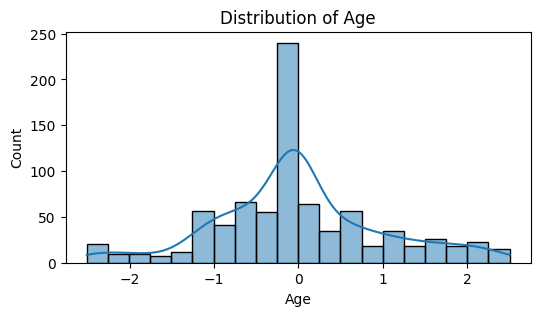

Age - Skewness: 0.17, Kurtosis: 0.36


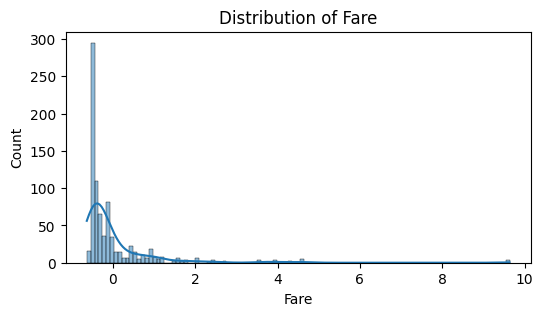

Fare - Skewness: 4.94, Kurtosis: 35.07


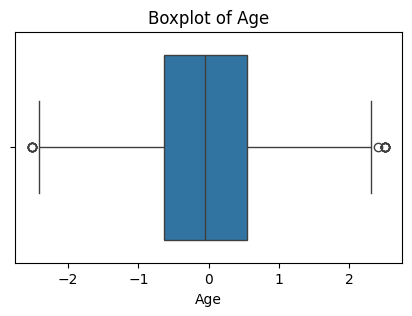

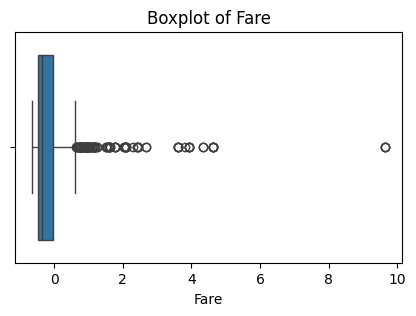

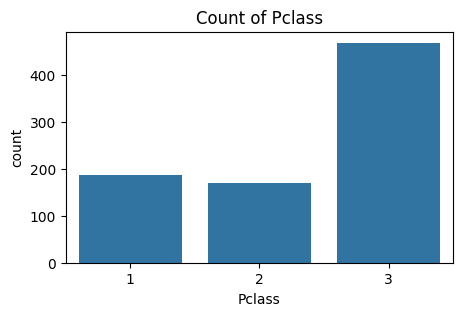

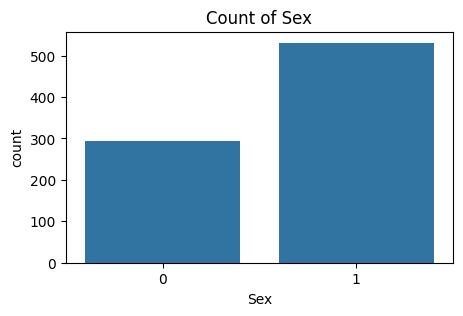

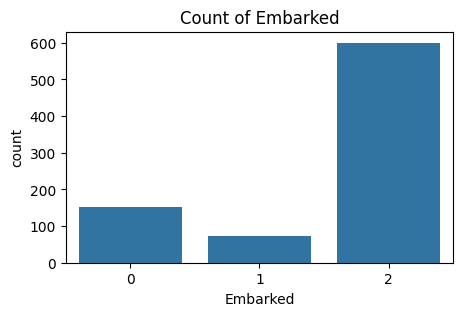

In [13]:
# --- DAY 3: UNIVARIATE ANALYSIS ---

# 1️⃣ Numerical Distributions
for col in ['Age','Fare']:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(f"{col} - Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}")

# 2️⃣ Boxplots
for col in ['Age','Fare']:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 3️⃣ Categorical Counts
for col in ['Pclass','Sex','Embarked']:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()


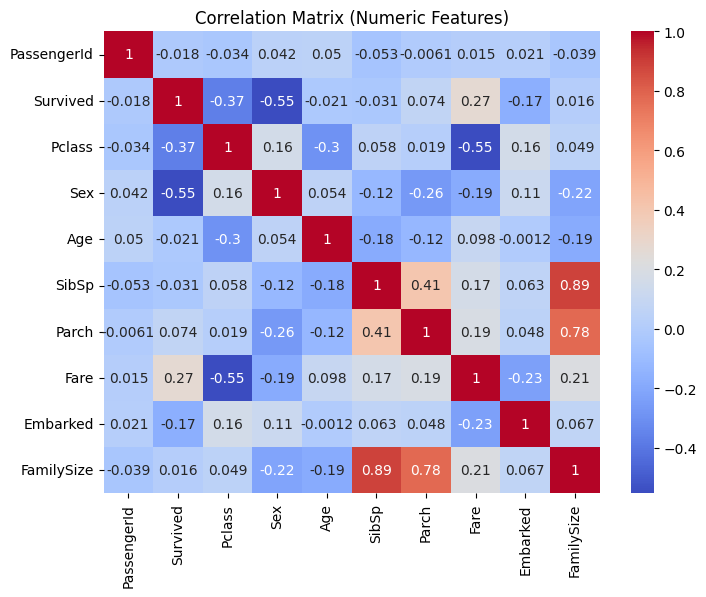

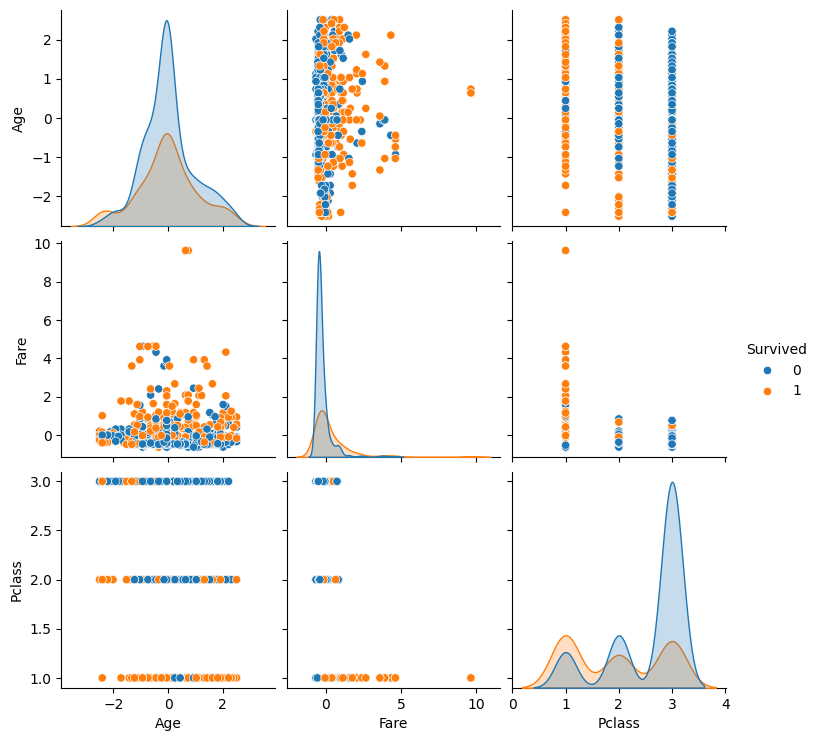

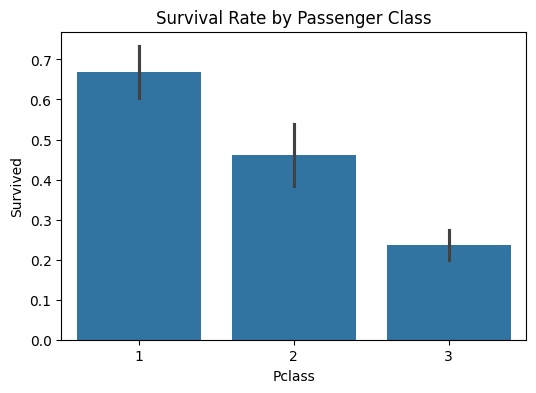

In [15]:
# Day 4: Bivariate Analysis - Fixed Version

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your preprocessed dataset
df = pd.read_csv("/content/Titanic_preprocessed.csv")

# 1️⃣ Correlation Heatmap (numeric only)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# 2️⃣ Pairplot - visualize relationships
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', diag_kind='kde')
plt.show()

# 3️⃣ Additional Bivariate Example
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


/tmp/ipython-input-3744046542.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df, values='Survived', index='Pclass', columns='AgeGroup', aggfunc=np.mean)
/tmp/ipython-input-3744046542.py:7: FutureWarning: The provided callable <function mean at 0x7e582f140220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(df, values='Survived', index='Pclass', columns='AgeGroup', aggfunc=np.mean)


Survival Rate Pivot Table:
 AgeGroup     Child
Pclass            
1         0.672897
2         0.433735
3         0.177966


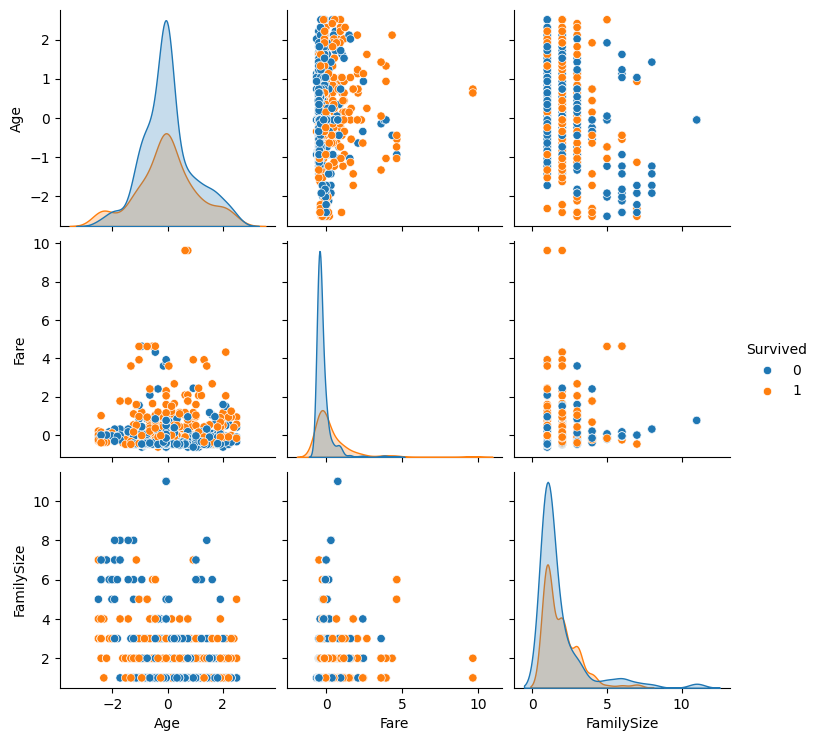

In [16]:
# --- DAY 5: MULTIVARIATE ANALYSIS & FEATURE ENGINEERING ---

# Create bins for Age
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,20,40,60,80], labels=['Child','Teen','Adult','MidAge','Senior'])

# Pivot table: survival by class and age group
pivot = pd.pivot_table(df, values='Survived', index='Pclass', columns='AgeGroup', aggfunc=np.mean)
print("Survival Rate Pivot Table:\n", pivot)

# Pairplot
sns.pairplot(df[['Age','Fare','FamilySize','Survived']], hue='Survived')
plt.show()


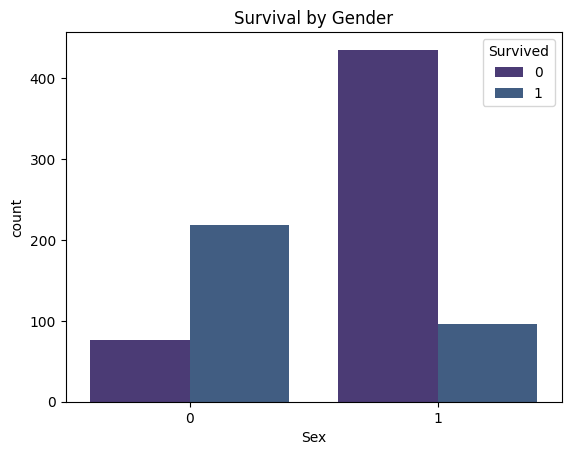

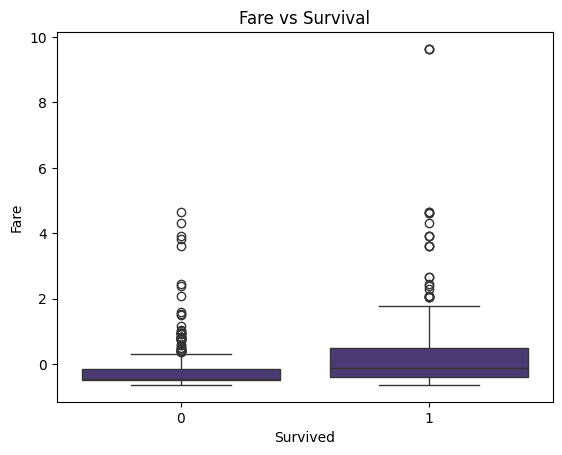

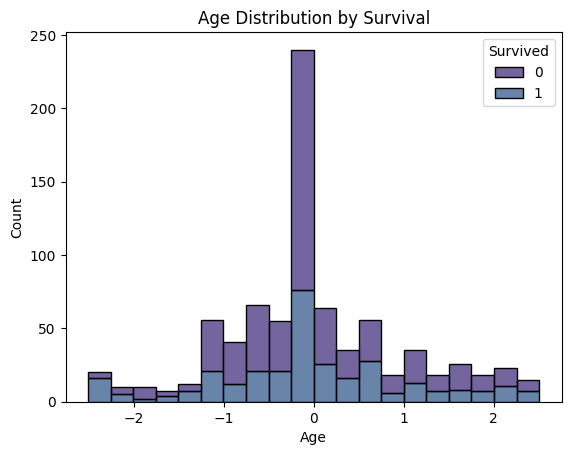


✅ Insights:
- Women had higher survival probability.
- Higher ticket class = higher survival.
- Young passengers survived more often.
- Fare positively correlated with survival.



In [17]:
# --- DAY 6: VISUALIZATION & INSIGHTS ---

sns.set_palette('viridis')

# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

# Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

print("""
✅ Insights:
- Women had higher survival probability.
- Higher ticket class = higher survival.
- Young passengers survived more often.
- Fare positively correlated with survival.
""")


Dataset Shape: (145, 33)

Column Names:
 Index(['STUDENT ID', 'Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Number of sisters/brothers', 'Parental status',
       'Mother’s occupation', 'Father’s occupation', 'Weekly study hours',
       'Reading frequency', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point averag

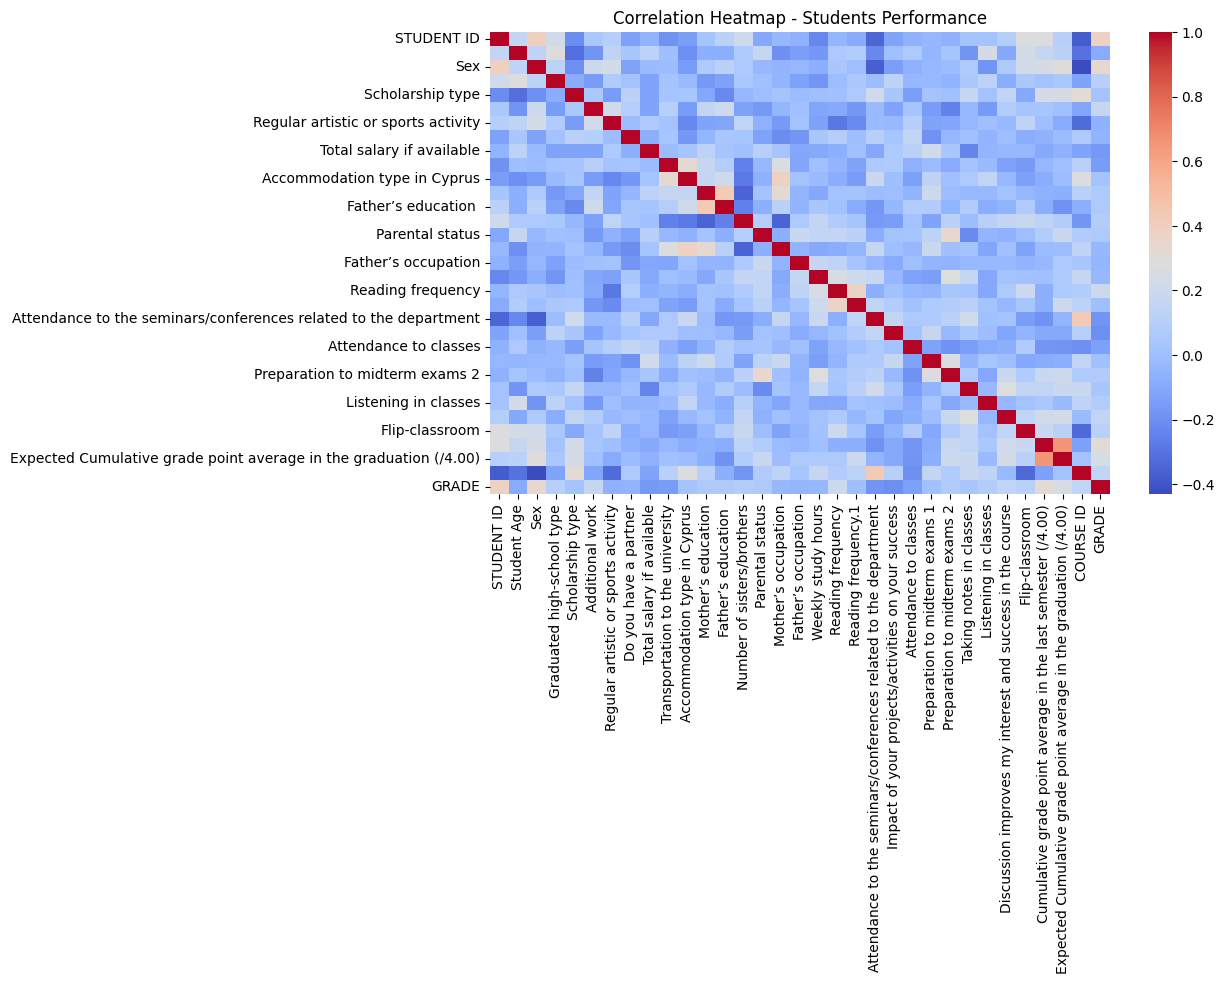

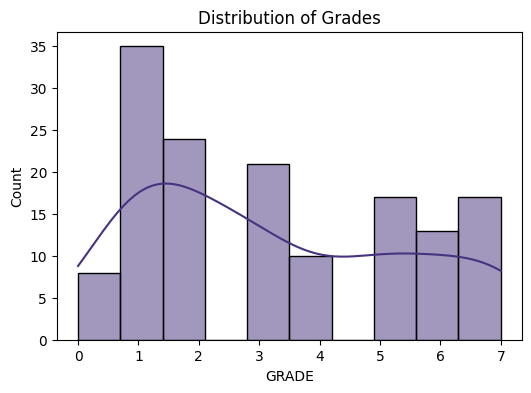

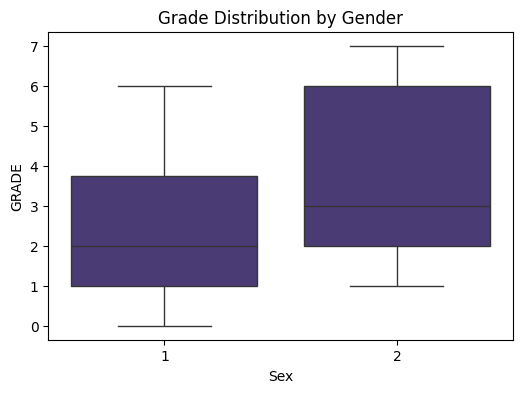

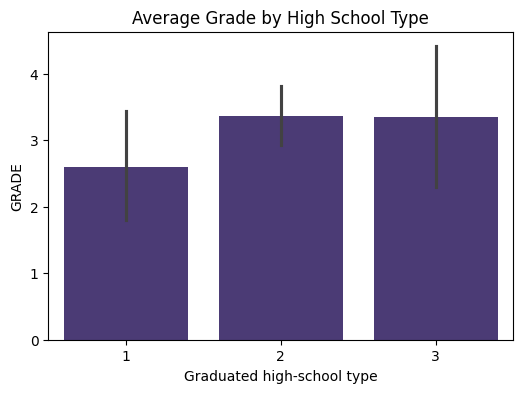

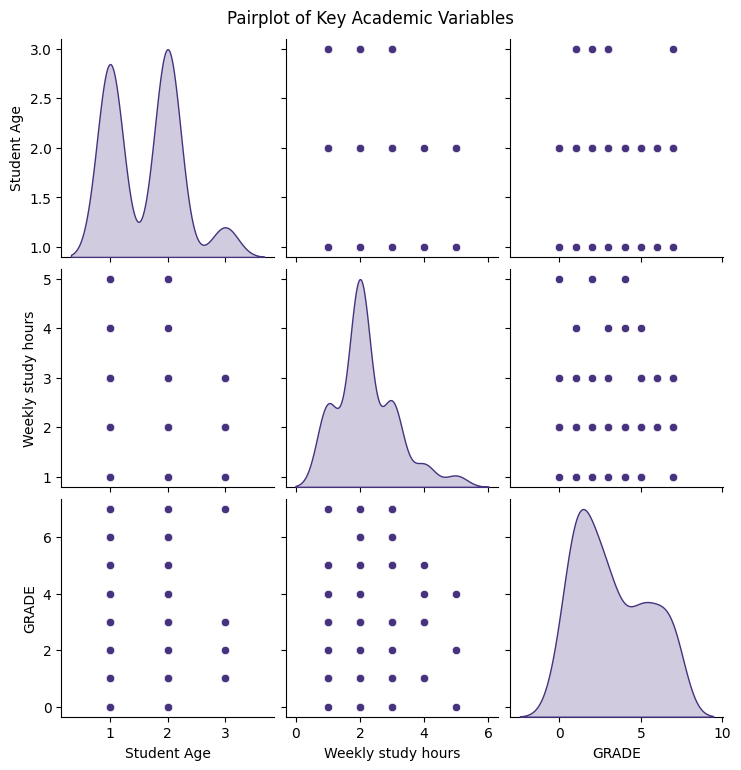


📊 Key Insights:
1️⃣ Grades appear normally distributed with slight skew.
2️⃣ Students with higher weekly study hours tend to have better grades.
3️⃣ Some correlation found between parental education and GPA-related variables.
4️⃣ Gender and high school type have minor but visible effects on grades.
✅ Dataset cleaned, encoded, and visualized successfully!


In [19]:
# 📘 Day 7: Final EDA Project & Reporting
# Dataset: Students Performance

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Dataset
df = pd.read_csv("/content/StudentsPerformance_with_headers.csv")

# Display basic structure
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())

# 3️⃣ Data Information
print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe(include='all'))

# 4️⃣ Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# If missing values exist, fill or drop
df.fillna(df.mode().iloc[0], inplace=True)

# 5️⃣ Check Duplicates
print("\nDuplicates before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after removal:", df.duplicated().sum())

# 6️⃣ Convert categorical variables if needed
# Example: 'Sex', 'Graduated high-school type' etc.
cat_cols = df.select_dtypes(include='object').columns
print("\nCategorical Columns:", cat_cols)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 7️⃣ Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap - Students Performance")
plt.show()

# 8️⃣ Distribution of Target Variable
if 'GRADE' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['GRADE'], kde=True, bins=10)
    plt.title("Distribution of Grades")
    plt.show()

# 9️⃣ Feature Relationships
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex', y='GRADE', data=df)
plt.title("Grade Distribution by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Graduated high-school type', y='GRADE', data=df)
plt.title("Average Grade by High School Type")
plt.show()

# 10️⃣ Pairplot (multivariate relationships)
sns.pairplot(df[['Student Age', 'Weekly study hours', 'GRADE']], diag_kind='kde')
plt.suptitle("Pairplot of Key Academic Variables", y=1.02)
plt.show()

# 11️⃣ Insights Summary
print("\n📊 Key Insights:")
print("1️⃣ Grades appear normally distributed with slight skew.")
print("2️⃣ Students with higher weekly study hours tend to have better grades.")
print("3️⃣ Some correlation found between parental education and GPA-related variables.")
print("4️⃣ Gender and high school type have minor but visible effects on grades.")
print("✅ Dataset cleaned, encoded, and visualized successfully!")

